In [1035]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (16,8)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1036]:
palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [1037]:
df = pd.read_csv('movie_metadata.csv')

In [1038]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [1039]:
nan_budget = df[df['budget'].isnull()]

In [1040]:
df.shape

(5043, 28)

In [1041]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [1042]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

## Предобработка данных

In [1043]:
#Замена пропущенных числовых значений медианами

df.loc[:, df.dtypes!='object'] = df.loc[:, df.dtypes!='object'].fillna(df.median(numeric_only=True))

In [1044]:
#Кол-во пропущеных значений типа объект

df.isnull().sum()[df.isnull().sum()>0]

color              19
director_name     104
actor_2_name       13
actor_1_name        7
actor_3_name       23
plot_keywords     153
language           12
country             5
content_rating    303
dtype: int64

In [1045]:
#Замена пропущенных значений типа объект

df.loc[:, df.dtypes=='object'] = df.loc[:, df.dtypes=='object'].fillna('Unknown')

In [1046]:
#Замена выполнена

df.isnull().sum().sum()

0

In [1047]:
unknown_count = df.apply(lambda row: row.apply(str).str.contains('Unknown')).sum(axis=1)

In [1048]:
unknown_count.value_counts()

0    4578
1     331
2     110
4      12
3      10
6       1
7       1
dtype: int64

In [1049]:
#Удаление данных о фильмах, которые содержат более 2 пропусков в значениях

df = df.drop(df.index[unknown_count[unknown_count>2].index]).reset_index(drop=True)

In [1050]:
df['movie_title'] = df['movie_title'].apply(lambda x: x.strip())
df.set_index('movie_title', inplace=True)

In [1051]:
#соотношение выручки к бюджету

df['profit_ratio'] = (df['gross']/df['budget']).round(2)

In [1052]:
df = df[~df.index.duplicated(keep='first')]

# Анализ

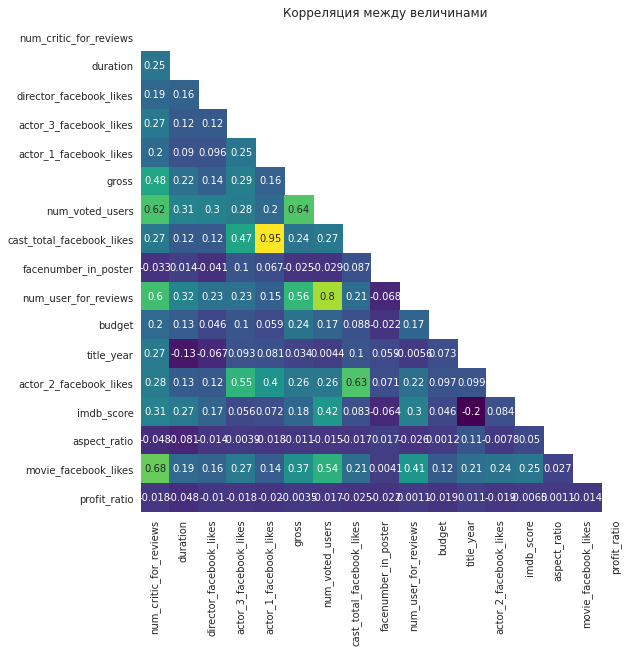

In [1053]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 9))
    ax = sns.heatmap(corr, mask=mask, annot=True, square=True, cmap='viridis', cbar=False)

plt.title('Корреляция между величинами')
plt.show()

Выручка коррелирует с кол-вом лайков на фейсбуке, кол-вом проголосовавших зрителей и не только. Есть положительная корреляция между продолжительностью фильма и его оценкой, а также отрицательная корреляция между оценкой фильма и годом изготовления. Старые фильмы ценятся больше.

### Самые популярные жанры

In [1054]:
#Здесь свалены в кучу все жанры

all_genres = ' '.join(df.genres.apply(lambda x: x.replace('|', ' '))).split()

In [1055]:
#Уникальные жанры

unique_genres = sorted(list(set(all_genres)))
print(unique_genres)

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']


In [1056]:
#Считаем количество упоминаний каждого из жанров

genre_count = []
counter = 0
for i in unique_genres:
    counter = 0
    for j in all_genres:
        if i==j:
            counter += 1
    genre_count.append(counter)   

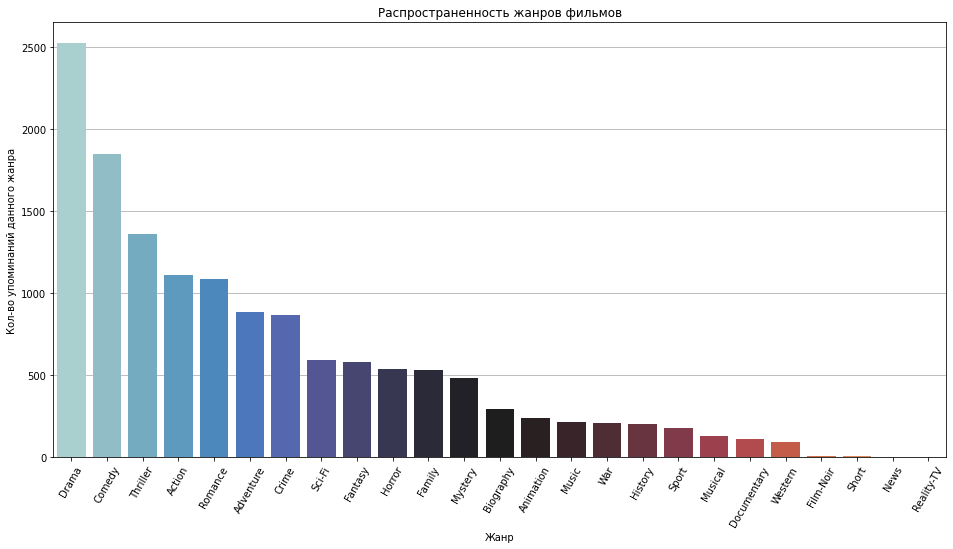

In [1057]:
genres_df = pd.DataFrame({'genre': unique_genres, 'count': genre_count})\
    .sort_values(by='count', ascending=False).reset_index(drop=True)

sns.barplot(x=genres_df['genre'], y=genres_df['count'], palette='icefire', zorder=2)
plt.xticks(rotation=60)
plt.grid(True, axis='y')
plt.xlabel('Жанр')
plt.ylabel('Кол-во упоминаний данного жанра')
plt.title('Распространенность жанров фильмов')
plt.show()

In [1058]:
top_10_genres = genres_df[:10]
top_10_genres

,genre,count
0,Drama,2522
1,Comedy,1845
2,Thriller,1359
3,Action,1108
4,Romance,1083
5,Adventure,886
6,Crime,864
7,Sci-Fi,593
8,Fantasy,580
9,Horror,538


In [1059]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit_ratio
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,3.21
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1.03
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0.82
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1.79
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,0.28


### Самые дорогостоящие фильмы

Важное замечание: некоторые данные о бюджете фильмов не достоверны, т.к. представлены в другой валюте (не в долларах США). 

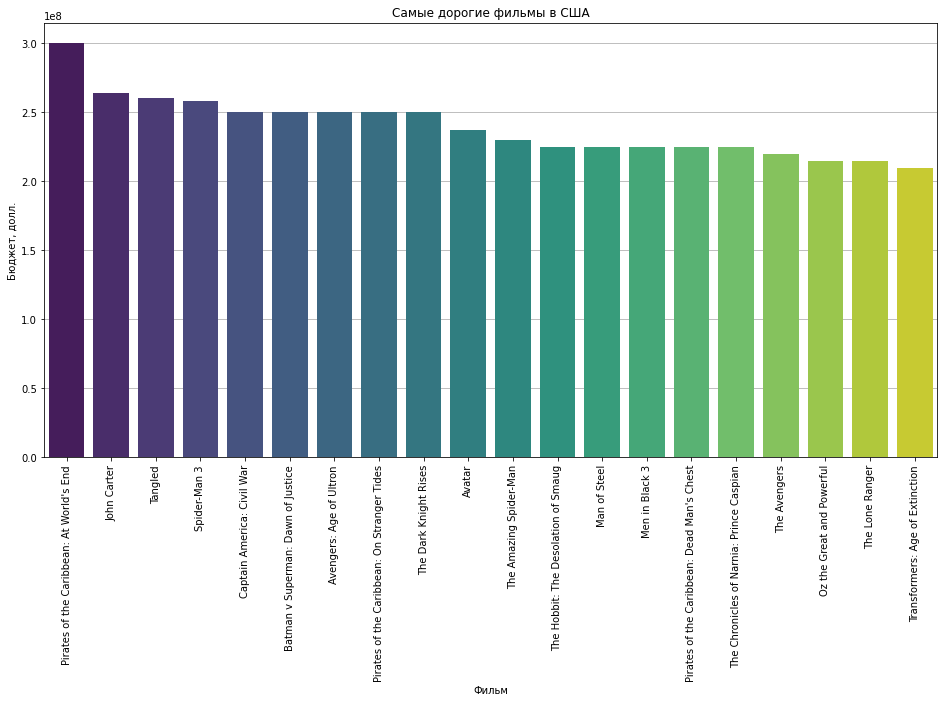

In [1060]:
df = df.sort_values(by='budget', ascending=False)
sns.barplot(x=df[df['country']=='USA']['budget'][:20].index, y=df[df['country']=='USA']['budget'][:20], palette='viridis', zorder=2)
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.xlabel('Фильм')
plt.ylabel('Бюджет, долл.')
plt.title('Самые дорогие фильмы в США')
plt.show()

In [1061]:
#Топ 20 самых дорогих фильмов (в США)

usa_films = df[df['country']=='USA']
top_20_budget = df[df['country']=='USA'][:20]
top_20_budget['budget']

movie_title
Pirates of the Caribbean: At World's End       300000000.0
John Carter                                    263700000.0
Tangled                                        260000000.0
Spider-Man 3                                   258000000.0
Captain America: Civil War                     250000000.0
Batman v Superman: Dawn of Justice             250000000.0
Avengers: Age of Ultron                        250000000.0
Pirates of the Caribbean: On Stranger Tides    250000000.0
The Dark Knight Rises                          250000000.0
Avatar                                         237000000.0
The Amazing Spider-Man                         230000000.0
The Hobbit: The Desolation of Smaug            225000000.0
Man of Steel                                   225000000.0
Men in Black 3                                 225000000.0
Pirates of the Caribbean: Dead Man's Chest     225000000.0
The Chronicles of Narnia: Prince Caspian       225000000.0
The Avengers                                

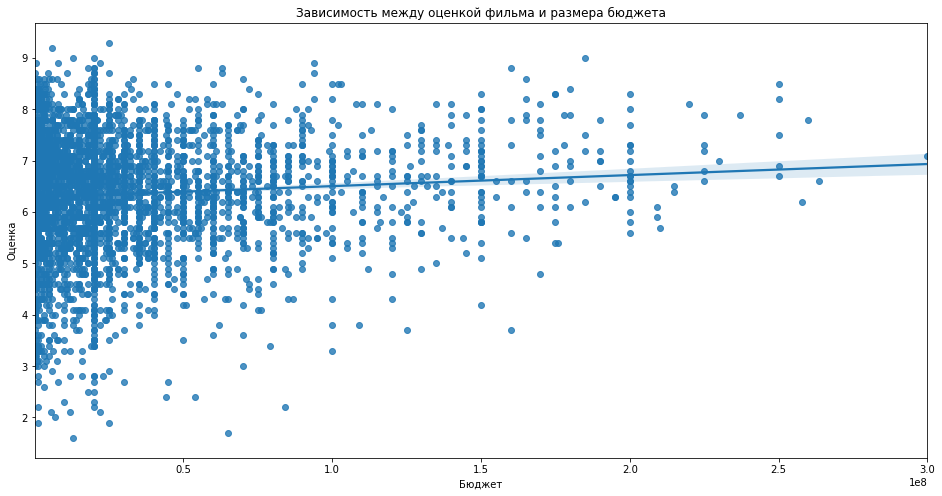

In [1062]:
sns.regplot(x=usa_films.budget, y=usa_films.imdb_score)
plt.xlabel('Бюджет')
plt.ylabel('Оценка')
plt.title('Зависимость между оценкой фильма и размера бюджета')
plt.show()

Значительной положительной взаимосвязи не обнаружено, но небольшая зависимость есть. Можно сделать шедевр кинематографа с малым бюджетом, также можно снять посредственный фильм, вложив в него сотни миллионов.

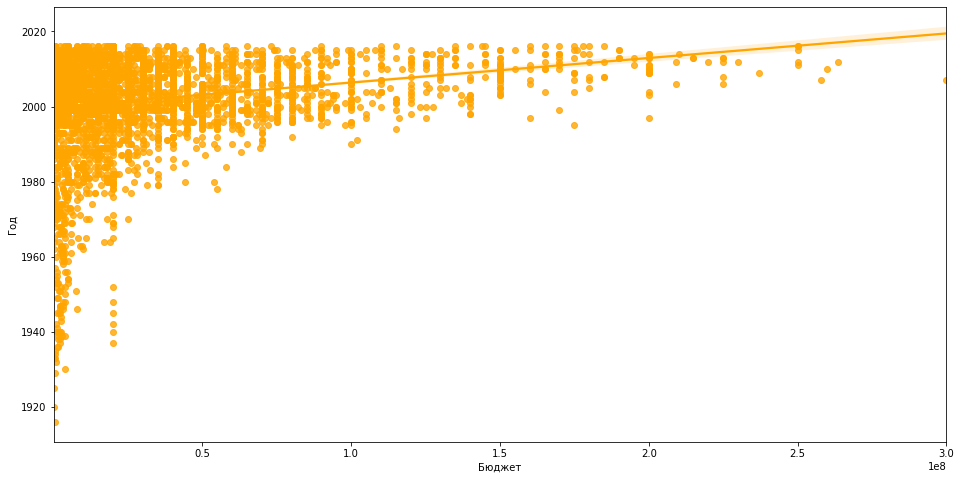

In [1063]:
sns.regplot(x=usa_films.budget, y=usa_films.title_year, color='orange')
plt.xlabel('Бюджет')
plt.ylabel('Год')
plt.show()

За последние 20 лет американцы стали больше вкладывать в киноиндустрию, снимать более дорогие фильмы. Даже с учетом девальвации доллара за последние десятилетия прирост очевиден.

### Годы производства

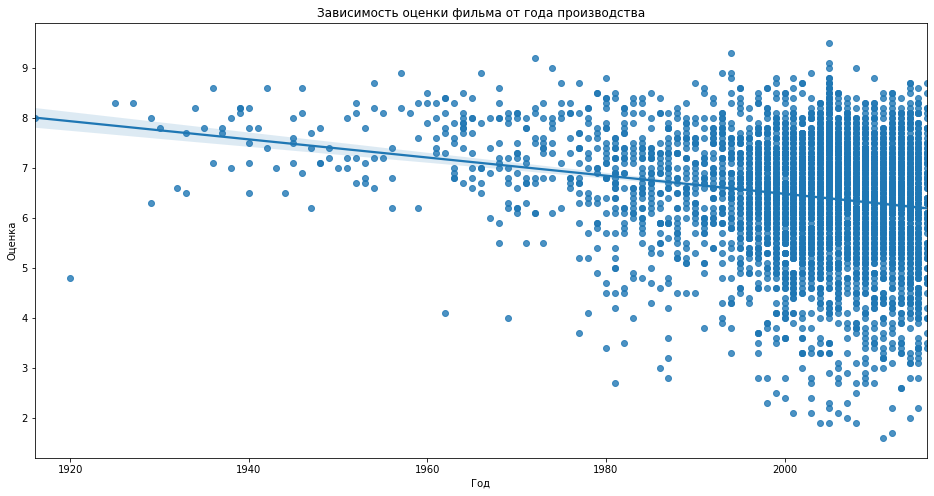

In [1064]:
sns.regplot(x=df['title_year'], y=df['imdb_score'])
plt.title('Зависимость оценки фильма от года производства')
plt.xlabel('Год')
plt.ylabel('Оценка')
plt.show()

Видно, что в последние десятилетия количество фильмов сильно выросло, но при этом упало их качество.

In [1065]:
cols = ['imdb_score', 'genres', 'title_year', 'country', 'director_name', 'gross', 'budget', 'profit_ratio', 'genres', 'content_rating', 'movie_imdb_link']
oldest_films = df[cols].sort_values(by='title_year')[:10]
oldest_films

,imdb_score,genres,title_year,country,director_name,gross,budget,profit_ratio,genres,content_rating,movie_imdb_link
movie_title,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,8.0,Drama|History|War,1916.0,USA,D.W. Griffith,25517500.0,385907.0,66.12,Drama|History|War,Not Rated,http://www.imdb.com/title/tt0006864/?ref_=fn_t...
Over the Hill to the Poorhouse,4.8,Crime|Drama,1920.0,USA,Harry F. Millarde,3000000.0,100000.0,30.00,Crime|Drama,Unknown,http://www.imdb.com/title/tt0011549/?ref_=fn_t...
The Big Parade,8.3,Drama|Romance|War,1925.0,USA,King Vidor,25517500.0,245000.0,104.15,Drama|Romance|War,Not Rated,http://www.imdb.com/title/tt0015624/?ref_=fn_t...
Metropolis,8.3,Drama|Sci-Fi,1927.0,Germany,Fritz Lang,26435.0,6000000.0,0.00,Drama|Sci-Fi,Not Rated,http://www.imdb.com/title/tt0017136/?ref_=fn_t...
The Broadway Melody,6.3,Musical|Romance,1929.0,USA,Harry Beaumont,2808000.0,379000.0,7.41,Musical|Romance,Passed,http://www.imdb.com/title/tt0019729/?ref_=fn_t...
Pandora's Box,8.0,Crime|Drama|Romance,1929.0,Germany,Georg Wilhelm Pabst,9950.0,20000000.0,0.00,Crime|Drama|Romance,Not Rated,http://www.imdb.com/title/tt0018737/?ref_=fn_t...
Hell's Angels,7.8,Drama|War,1930.0,USA,Howard Hughes,25517500.0,3950000.0,6.46,Drama|War,Passed,http://www.imdb.com/title/tt0020960/?ref_=fn_t...
A Farewell to Arms,6.6,Drama|Romance|War,1932.0,USA,Frank Borzage,25517500.0,800000.0,31.90,Drama|Romance|War,Unrated,http://www.imdb.com/title/tt0022879/?ref_=fn_t...
She Done Him Wrong,6.5,Comedy|Drama|History|Musical|Romance,1933.0,USA,Lowell Sherman,25517500.0,200000.0,127.59,Comedy|Drama|History|Musical|Romance,Approved,http://www.imdb.com/title/tt0024548/?ref_=fn_t...


### Длительность фильма

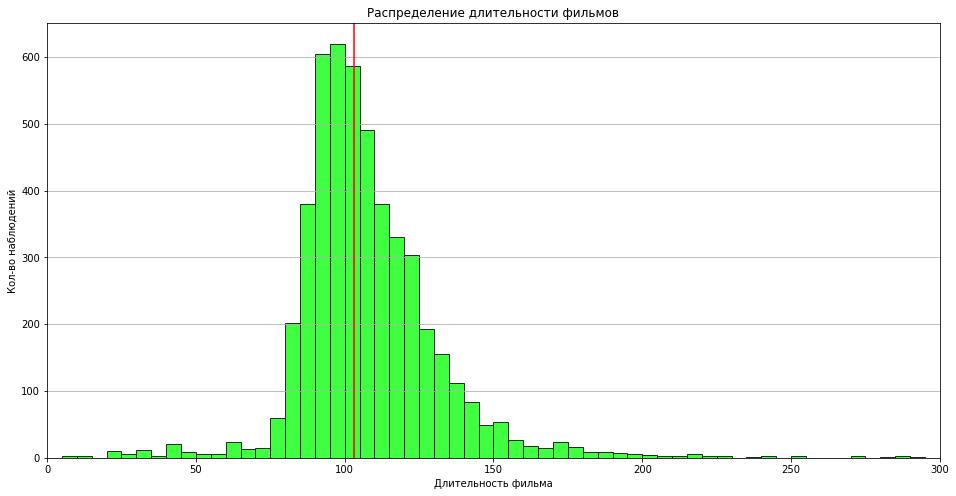

In [1066]:
sns.histplot(df['duration'], color='lime', bins=np.arange(df['duration'].min()-2, df['duration'].max()+1, 5))
plt.xlim(0, 300)
plt.axvline(df['duration'].median(), color='r')
plt.grid(True, axis='y')
plt.title('Распределение длительности фильмов')
plt.xlabel('Длительность фильма')
plt.ylabel('Кол-во наблюдений')
plt.show()

Чаще всего фильм длится от 85 до 110 минут, медиана - 103 мин.

### Лучшие режиссеры

In [1067]:
#Топ 20 режиссеров

top_20_dir = df.groupby(df['director_name'])['imdb_score'].agg(['count','mean']).sort_values(by='count', ascending=False)[1:21]
top_20_dir['total_score'] = top_20_dir['count']*top_20_dir['mean']
top_20_dir.sort_values(by='total_score', ascending=False, inplace=True)
top_20_dir

,count,mean,total_score
director_name,,,
Steven Spielberg,26,7.480769,194.5
Woody Allen,22,7.009091,154.2
Martin Scorsese,20,7.660000,153.2
Clint Eastwood,20,7.225000,144.5
Ridley Scott,16,7.131250,114.1
Spike Lee,16,6.568750,105.1
Steven Soderbergh,15,6.680000,100.2
Tim Burton,14,7.050000,98.7
Oliver Stone,14,6.950000,97.3


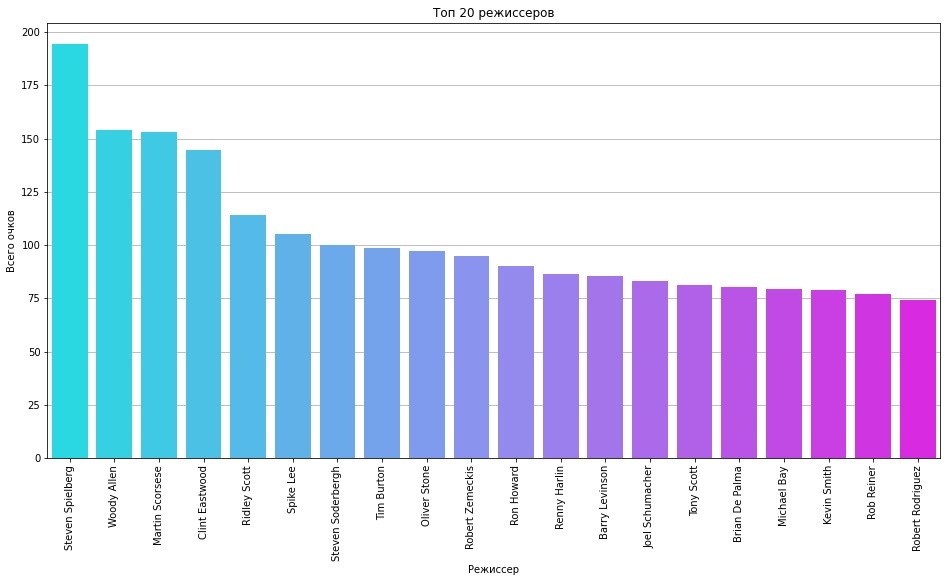

In [1068]:
sns.barplot(x=top_20_dir.index, y=top_20_dir['total_score'], palette='cool', zorder=2)
plt.grid(True, axis='y')
plt.xticks(rotation=90)
plt.title('Топ 20 режиссеров')
plt.xlabel('Режиссер')
plt.ylabel('Всего очков')
plt.show()

Цифры явно указывают на то, что Стивен Спилберг является лидером в этом рейтинге

In [1069]:
#Функция, которая позволяет получить данные о топ 5 фильмах любого из режиссеров

#Аргументы: 
# 1)Желаемое кол-во фильмов данного режиссера 
# 2)имя и фамилия режиссера, 
# 3)столбец, по которому сортируем, 
# 4)порядок сортировки (убывание - False и наоборот)

def top_films(count, director, sorting, ascending):
    cols = ['imdb_score', 'genres', 'title_year', 'country', 'gross', 'budget', 'profit_ratio', 'genres', 'duration', 'content_rating', 'movie_imdb_link']
    top_5_df = df[df['director_name']==director][cols].sort_values(by=sorting, ascending=ascending)[:count]
    return top_5_df

In [1070]:
#Можно выбрать режиссера из этого списка

print(list(top_20_dir.index))

['Steven Spielberg', 'Woody Allen', 'Martin Scorsese', 'Clint Eastwood', 'Ridley Scott', 'Spike Lee', 'Steven Soderbergh', 'Tim Burton', 'Oliver Stone', 'Robert Zemeckis', 'Ron Howard', 'Renny Harlin', 'Barry Levinson', 'Joel Schumacher', 'Tony Scott', 'Brian De Palma', 'Michael Bay', 'Kevin Smith', 'Rob Reiner', 'Robert Rodriguez']


In [1071]:
top_films(5, 'Woody Allen', 'imdb_score', False)

,imdb_score,genres,title_year,country,gross,budget,profit_ratio,genres,duration,content_rating,movie_imdb_link
movie_title,,,,,,,,,,,
Annie Hall,8.1,Comedy|Romance,1977.0,USA,39200000.0,4000000.0,9.80,Comedy|Romance,93.0,PG,http://www.imdb.com/title/tt0075686/?ref_=fn_t...
Match Point,7.7,Drama|Romance|Thriller,2005.0,UK,23089926.0,15000000.0,1.54,Drama|Romance|Thriller,119.0,R,http://www.imdb.com/title/tt0416320/?ref_=fn_t...
Midnight in Paris,7.7,Comedy|Fantasy|Romance,2011.0,Spain,56816662.0,17000000.0,3.34,Comedy|Fantasy|Romance,94.0,PG-13,http://www.imdb.com/title/tt1605783/?ref_=fn_t...
Radio Days,7.6,Comedy,1987.0,USA,14792779.0,16000000.0,0.92,Comedy,88.0,PG,http://www.imdb.com/title/tt0093818/?ref_=fn_t...
Bullets Over Broadway,7.5,Comedy|Crime,1994.0,USA,13383737.0,20000000.0,0.67,Comedy|Crime,98.0,R,http://www.imdb.com/title/tt0109348/?ref_=fn_t...


### Анализ жанров

In [1072]:
#Функция, подсчитывающая количество указанных жанров для каждого фильма

def count_genres(x):
    counter=0
    for i in x:
        if i=='|':
            counter+=1
    return counter+1

In [1073]:
df['genres'].apply(count_genres).value_counts()

3    1573
2    1322
4     950
1     612
5     341
6      73
7      18
8       3
Name: genres, dtype: int64

Обычно кол-во указанных жанров не превышает 4

In [1074]:
#Функция, разбивающая жанры по столбцам 

def split_genres(x):
    x = pd.Series(x.split(sep='|')[:4])
    return x

In [1075]:
genres_df = df['genres'].apply(split_genres).\
    rename(columns={0:'genre_1', 1:'genre_2', 2:'genre_3', 3:'genre_4'}).fillna('-')

df = genres_df.merge(df, left_index=True, right_index=True)
df.head()

,genre_1,genre_2,genre_3,genre_4,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit_ratio
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lady Vengeance,Crime,Drama,-,-,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000,0.0
Fateless,Drama,Romance,War,-,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607,0.0
Princess Mononoke,Adventure,Animation,Fantasy,-,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000,0.0
Steamboy,Action,Adventure,Animation,Family,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973,0.0
Akira,Action,Animation,Sci-Fi,-,Color,Katsuhiro Ôtomo,150.0,124.0,78.0,4.0,Takeshi Kusao,6.0,439162.0,Action|Animation|Sci-Fi,Mitsuo Iwata,106160,28,Tesshô Genda,0.0,based on manga|biker gang|gifted child|post th...,http://www.imdb.com/title/tt0094625/?ref_=fn_t...,430.0,Japanese,Japan,R,1.100000e+09,1988.0,5.0,8.1,1.85,0,0.0


In [1076]:
#Количество жанров, которые упоминаются в датафрейме (ничего не потерялось)

len(np.unique(np.concatenate([df[df[col]!='-'][col].unique() for col in list(df.iloc[:, 0:4].columns)])))

25

In [1077]:
len(unique_genres)

25

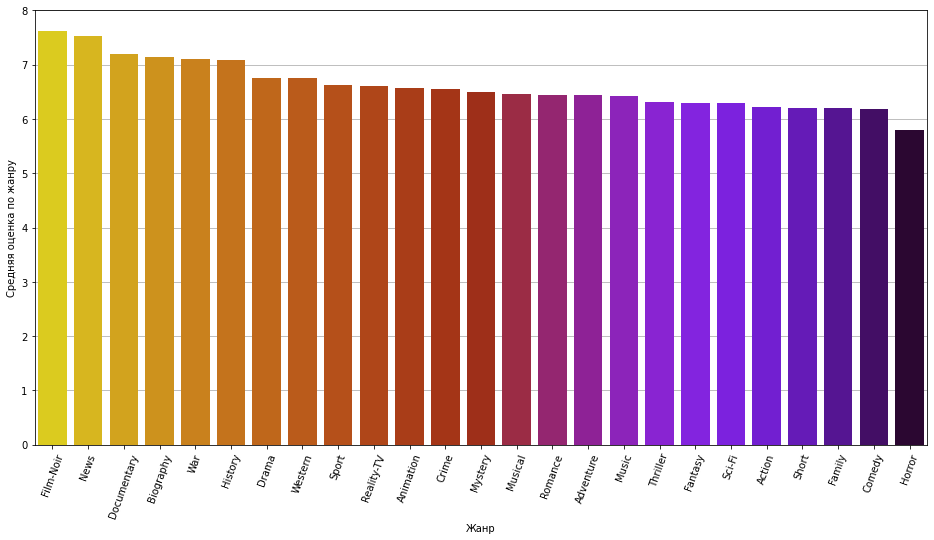

In [1078]:
genre_score = [round(df[(df['genre_1']==genre)|(df['genre_2']==genre)|
    (df['genre_3']==genre)|(df['genre_4']==genre)]['imdb_score'].mean(), 2) for genre in unique_genres]

genre_score_df = pd.DataFrame({'genre':unique_genres, 'mean_score':genre_score}).dropna().\
    sort_values(by='mean_score', ascending=False).reset_index(drop=True)

sns.barplot(data=genre_score_df, x='genre', y='mean_score', zorder=2, palette='gnuplot_r')
plt.xlabel('Жанр')
plt.ylabel('Средняя оценка по жанру')
plt.grid(True, axis='y')
plt.xticks(rotation=70)
plt.show()

Наилучшая оценка встречается в жанре нуар, новостных и документальных фильмах. Справедливости ради стоит заметить, что первые два жанра довольно редко встречаются, но при этом они имеют очень хороший рейтинг.

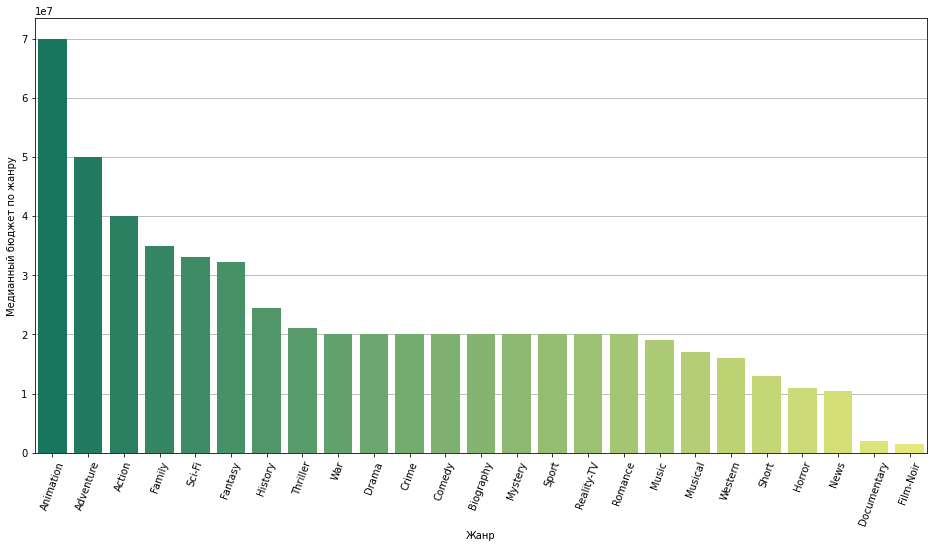

In [1079]:
genre_budget = [round(df[(df['language']=='English')&((df['genre_1']==genre)|(df['genre_2']==genre)|
    (df['genre_3']==genre)|(df['genre_4']==genre))]['budget'].median(), 2) for genre in unique_genres]

genre_budget_df = pd.DataFrame({'genre':unique_genres, 'median_budget':genre_budget}).dropna().\
    sort_values(by='median_budget', ascending=False).reset_index(drop=True)

sns.barplot(data=genre_budget_df, x='genre', y='median_budget', zorder=2, palette='summer')
plt.xlabel('Жанр')
plt.ylabel('Медианный бюджет по жанру')
plt.grid(True, axis='y')
plt.xticks(rotation=70)
plt.show()

Для создания анимационного и приключенческого фильма в среднем нужно больше всего денег.

### Самые часто встречающиеся актеры

In [1080]:
top_10_1_actors = df.groupby('actor_1_name').size().sort_values(ascending=False)[:10]
top_10_1_actors 

actor_1_name
Robert De Niro       48
Johnny Depp          36
Nicolas Cage         32
J.K. Simmons         29
Matt Damon           29
Denzel Washington    29
Bruce Willis         28
Liam Neeson          27
Robin Williams       27
Harrison Ford        27
dtype: int64

In [1081]:
top_10_2_actors = df.groupby('actor_2_name').size().sort_values(ascending=False)[:10]
top_10_2_actors 

actor_2_name
Morgan Freeman     18
Charlize Theron    14
Brad Pitt          13
Meryl Streep       11
James Franco       10
Adam Sandler       10
Bruce Willis        9
Will Ferrell        9
Scott Glenn         9
Tom Wilkinson       8
dtype: int64

### Какие страны делают хорошие фильмы?

In [1082]:
top_5_countries = df.groupby('country').size().sort_values(ascending=False)[:5]
top_5_countries

country
USA        3696
UK          432
France      154
Canada      123
Germany      94
dtype: int64

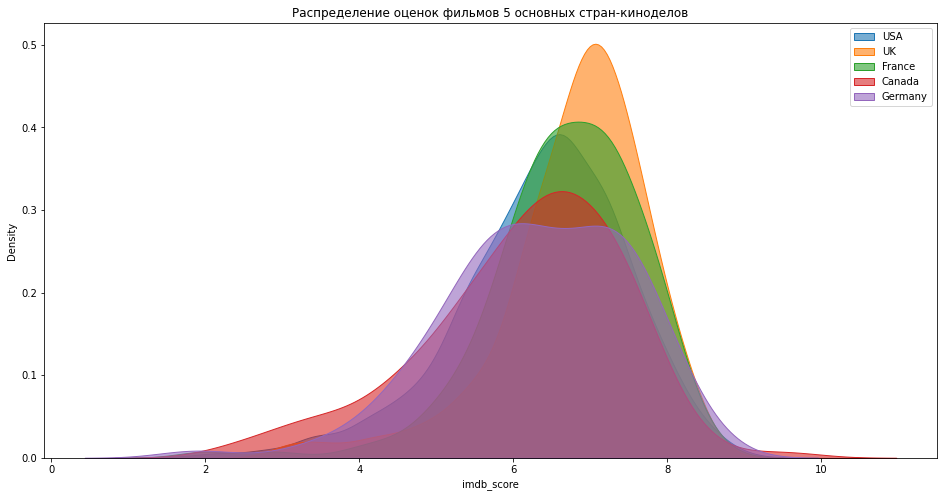

In [1083]:
for i in top_5_countries.index:
    sns.kdeplot(data=df[df['country']==i], x='imdb_score', fill=True, label=f'{i}', alpha=.6)
plt.title('Распределение оценок фильмов 5 основных стран-киноделов')
plt.legend()
plt.show()

Английские фильмы имеют более высокую оценку, как правило, чего не скажешь о немецких.

In [1084]:
countries_scores = pd.concat([df[df['country']==i][['imdb_score', 'country']] for i in df['country'].value_counts()[df['country'].value_counts()>10].index])
countries_scores.head()

,imdb_score,country
movie_title,,
Pirates of the Caribbean: At World's End,7.1,USA
John Carter,6.6,USA
Tangled,7.8,USA
Spider-Man 3,6.2,USA
Captain America: Civil War,8.2,USA


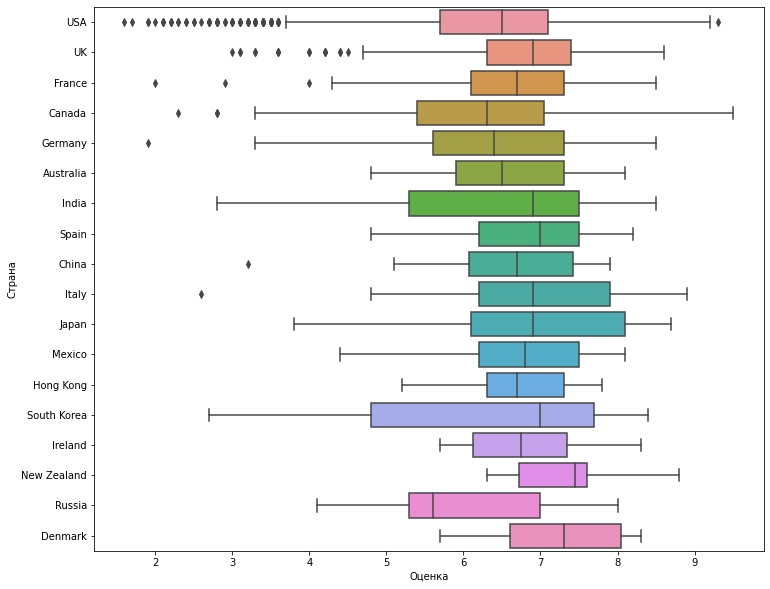

In [1085]:
plt.figure(figsize=(12,10))
sns.boxplot(data=countries_scores, x='imdb_score', y='country')
plt.xlabel('Оценка')
plt.ylabel('Страна')
plt.show()

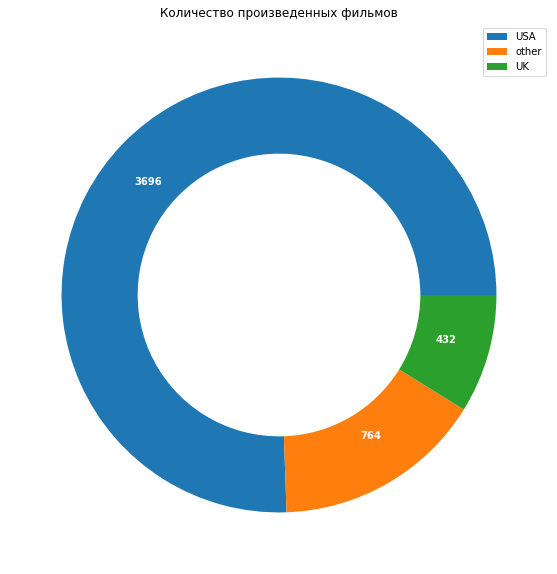

In [1086]:
def few_films(x):
    if x!='USA' and x!='UK':
        x = 'other'
    return x
data = df['country'].apply(few_films).value_counts()
plt.figure(figsize=(10,10))
plt.pie(data, wedgeprops = dict(width = 0.35), labels=data, labeldistance = 0.75, textprops={'color':"w", 'weight':'heavy'})
plt.title('Количество произведенных фильмов')
plt.legend(data.index)
plt.show()

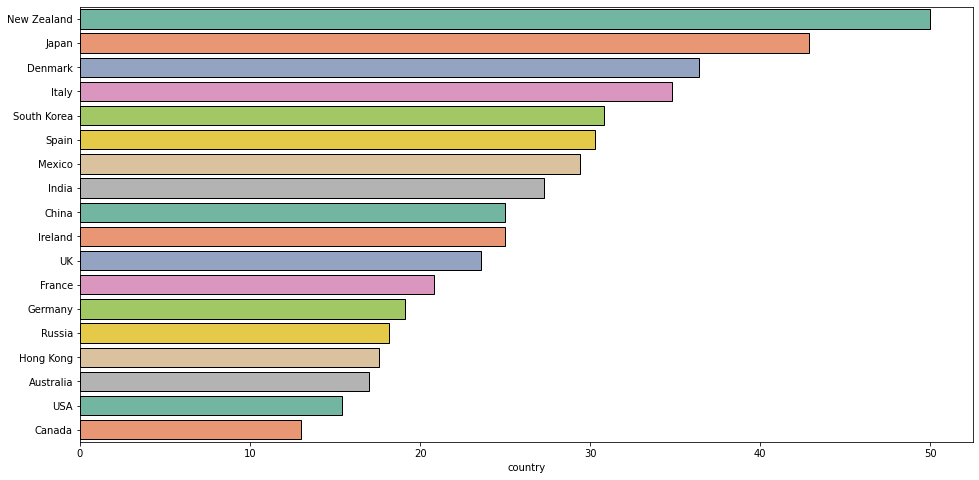

In [1087]:
good_films_pct = 100*(countries_scores[countries_scores['imdb_score']>=7.5]['country'].value_counts()/
     countries_scores['country'].value_counts()).round(3).dropna().sort_values(ascending=False)
sns.barplot(x=good_films_pct, y=good_films_pct.index, palette='Set2', ec='k')
plt.show()

Любопытно, но наибольшее процентное соотношение хороших фильмов (с рейтингом не менее 7,5) наблюдается в Новой Зеландии и Японии. В США, как ни странно, хороших фильмов очень немного, несмотря на то, что это мировой лидер киноиндустрии по количеству выпускаемых фильмов.

### Влияние возрастного ограничения

In [1088]:
top_5_content_rating = df.groupby('content_rating').size().sort_values(ascending=False)
top_5_content_rating.drop(labels=['Unknown'], inplace=True)
top_5_content_rating = top_5_content_rating[:5]
top_5_content_rating

content_rating
R            2067
PG-13        1411
PG            685
Not Rated     114
G             112
dtype: int64

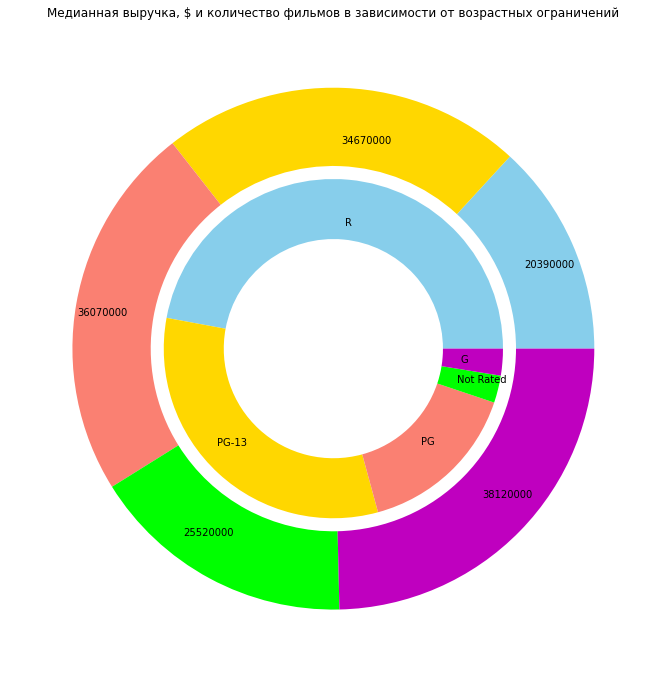

In [1089]:
colors = ['skyblue', 'gold', 'salmon', 'lime', 'm']
med_gross_content_rating = [df[df['content_rating']==i]['gross'].median() 
               for i in top_5_content_rating.index]
med_gross_content_rating = np.round(np.array(med_gross_content_rating), -4).astype(int)

plt.figure(figsize=(12,12))
#Внешний круг
plt.pie(med_gross_content_rating, wedgeprops = dict(width = 0.3), 
        colors=colors, labels=med_gross_content_rating, labeldistance = 0.8)
#Внутренний круг
plt.pie(top_5_content_rating, radius=0.65, labeldistance = 0.75, colors = colors, 
        wedgeprops = dict(width = 0.23), labels=top_5_content_rating.index)
plt.title('Медианная выручка, $ и количество фильмов в зависимости от возрастных ограничений')
plt.show()

Наиболее прибыльными являются фильмы с рейтингами G, PG и PG-13. <br>
G - Фильм демонстрируется без ограничений <br>
PG - Детям рекомендуется смотреть фильм с родителями <br>
PG-13 - Просмотр не желателен детям до 13 лет <br>
R - Лица, не достигшие 17-летнего возраста, допускаются на фильм только в сопровождении одного из родителей <br>

In [1090]:
df.head()

,genre_1,genre_2,genre_3,genre_4,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit_ratio
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lady Vengeance,Crime,Drama,-,-,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000,0.0
Fateless,Drama,Romance,War,-,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607,0.0
Princess Mononoke,Adventure,Animation,Fantasy,-,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000,0.0
Steamboy,Action,Adventure,Animation,Family,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973,0.0
Akira,Action,Animation,Sci-Fi,-,Color,Katsuhiro Ôtomo,150.0,124.0,78.0,4.0,Takeshi Kusao,6.0,439162.0,Action|Animation|Sci-Fi,Mitsuo Iwata,106160,28,Tesshô Genda,0.0,based on manga|biker gang|gifted child|post th...,http://www.imdb.com/title/tt0094625/?ref_=fn_t...,430.0,Japanese,Japan,R,1.100000e+09,1988.0,5.0,8.1,1.85,0,0.0


### Количество лайков

In [1091]:
#Посмотрим, у каких режиссеров больше всего лайков на фейсбуке

top_likes_dir = df[['director_name', 'director_facebook_likes']].sort_values(by='director_facebook_likes', ascending=False)\
        .drop_duplicates().reset_index(drop=True)[:10]
top_likes_dir

,director_name,director_facebook_likes
0,Joseph Gordon-Levitt,23000.0
1,Christopher Nolan,22000.0
2,David Fincher,21000.0
3,Derick Martini,20000.0
4,Kevin Spacey,18000.0
5,Denzel Washington,18000.0
6,Martin Scorsese,17000.0
7,Clint Eastwood,16000.0
8,Quentin Tarantino,16000.0
9,Tom Hanks,15000.0


In [1092]:
#Лидирующие фильмы по лайкам на фейсбуке

top_likes_films = df[['movie_facebook_likes']+cols].sort_values(by='movie_facebook_likes', ascending=False)[:10]
top_likes_films

,movie_facebook_likes,imdb_score,genres,title_year,country,director_name,gross,budget,profit_ratio,genres,content_rating,movie_imdb_link
movie_title,,,,,,,,,,,,
Interstellar,349000,8.6,Adventure|Drama|Sci-Fi,2014.0,USA,Christopher Nolan,187991439.0,165000000.0,1.14,Adventure|Drama|Sci-Fi,PG-13,http://www.imdb.com/title/tt0816692/?ref_=fn_t...
Django Unchained,199000,8.5,Drama|Western,2012.0,USA,Quentin Tarantino,162804648.0,100000000.0,1.63,Drama|Western,R,http://www.imdb.com/title/tt1853728/?ref_=fn_t...
Batman v Superman: Dawn of Justice,197000,6.9,Action|Adventure|Sci-Fi,2016.0,USA,Zack Snyder,330249062.0,250000000.0,1.32,Action|Adventure|Sci-Fi,PG-13,http://www.imdb.com/title/tt2975590/?ref_=fn_t...
Mad Max: Fury Road,191000,8.1,Action|Adventure|Sci-Fi|Thriller,2015.0,Australia,George Miller,153629485.0,150000000.0,1.02,Action|Adventure|Sci-Fi|Thriller,R,http://www.imdb.com/title/tt1392190/?ref_=fn_t...
The Revenant,190000,8.1,Adventure|Drama|Thriller|Western,2015.0,USA,Alejandro G. Iñárritu,183635922.0,135000000.0,1.36,Adventure|Drama|Thriller|Western,R,http://www.imdb.com/title/tt1663202/?ref_=fn_t...
Inception,175000,8.8,Action|Adventure|Sci-Fi|Thriller,2010.0,USA,Christopher Nolan,292568851.0,160000000.0,1.83,Action|Adventure|Sci-Fi|Thriller,PG-13,http://www.imdb.com/title/tt1375666/?ref_=fn_t...
The Hobbit: An Unexpected Journey,166000,7.9,Adventure|Fantasy,2012.0,USA,Peter Jackson,303001229.0,180000000.0,1.68,Adventure|Fantasy,PG-13,http://www.imdb.com/title/tt0903624/?ref_=fn_t...
The Imitation Game,165000,8.1,Biography|Drama|Thriller|War,2014.0,UK,Morten Tyldum,91121452.0,14000000.0,6.51,Biography|Drama|Thriller|War,PG-13,http://www.imdb.com/title/tt2084970/?ref_=fn_t...
The Dark Knight Rises,164000,8.5,Action|Thriller,2012.0,USA,Christopher Nolan,448130642.0,250000000.0,1.79,Action|Thriller,PG-13,http://www.imdb.com/title/tt1345836/?ref_=fn_t...


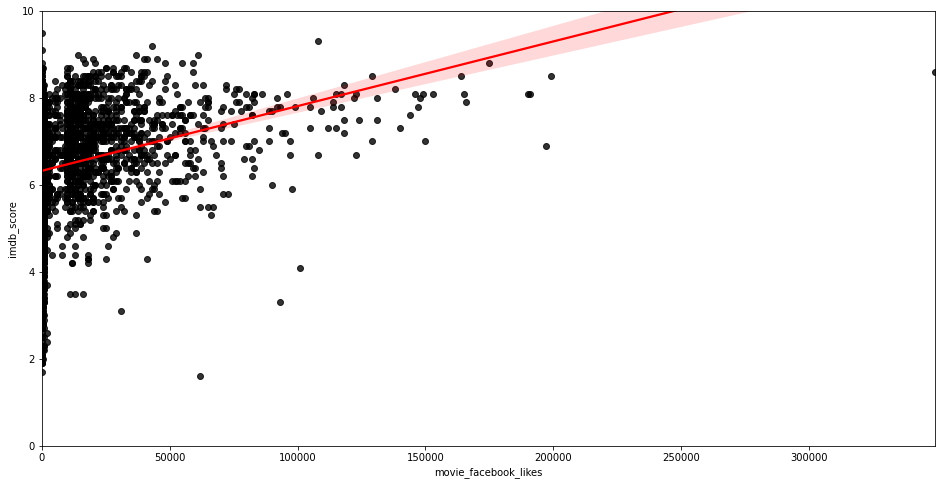

In [1093]:
sns.regplot(data=df, x='movie_facebook_likes', y='imdb_score', color='k', line_kws = {'color': 'r'})
plt.ylim(0,10)
plt.show()

Классные фильмы далеко не всегда набирают большое кол-во лайков, но довольно часто.

### Лучшие фильмы!

In [1094]:
best_films = df[cols].sort_values(by='imdb_score', ascending=False)[:10]
best_films

,imdb_score,genres,title_year,country,director_name,gross,budget,profit_ratio,genres,content_rating,movie_imdb_link
movie_title,,,,,,,,,,,
Towering Inferno,9.5,Comedy,2005.0,Canada,John Blanchard,25517500.0,20000000.0,1.28,Comedy,Unknown,http://www.imdb.com/title/tt0691996/?ref_=fn_t...
The Shawshank Redemption,9.3,Crime|Drama,1994.0,USA,Frank Darabont,28341469.0,25000000.0,1.13,Crime|Drama,R,http://www.imdb.com/title/tt0111161/?ref_=fn_t...
The Godfather,9.2,Crime|Drama,1972.0,USA,Francis Ford Coppola,134821952.0,6000000.0,22.47,Crime|Drama,R,http://www.imdb.com/title/tt0068646/?ref_=fn_t...
Dekalog,9.1,Drama,2005.0,Poland,Unknown,447093.0,20000000.0,0.02,Drama,TV-MA,http://www.imdb.com/title/tt0092337/?ref_=fn_t...
Fargo,9.0,Crime|Drama|Thriller,2005.0,USA,Unknown,25517500.0,20000000.0,1.28,Crime|Drama|Thriller,TV-MA,http://www.imdb.com/title/tt2802850/?ref_=fn_t...
The Dark Knight,9.0,Action|Crime|Drama|Thriller,2008.0,USA,Christopher Nolan,533316061.0,185000000.0,2.88,Action|Crime|Drama|Thriller,PG-13,http://www.imdb.com/title/tt0468569/?ref_=fn_t...
The Godfather: Part II,9.0,Crime|Drama,1974.0,USA,Francis Ford Coppola,57300000.0,13000000.0,4.41,Crime|Drama,R,http://www.imdb.com/title/tt0071562/?ref_=fn_t...
12 Angry Men,8.9,Crime|Drama,1957.0,USA,Sidney Lumet,25517500.0,350000.0,72.91,Crime|Drama,Not Rated,http://www.imdb.com/title/tt0050083/?ref_=fn_t...
Pulp Fiction,8.9,Crime|Drama,1994.0,USA,Quentin Tarantino,107930000.0,8000000.0,13.49,Crime|Drama,R,http://www.imdb.com/title/tt0110912/?ref_=fn_t...


In [1110]:
#Функция, которая находит данные о лучших фильмах той или иной страны

def best_films_countries(country, amount):
    cols1 = ['imdb_score', 'genres', 'title_year', 'country', 'director_name', 'genres', 'content_rating', 'movie_imdb_link']
    if country=='USA':
        x = df[(df['country']==country)&(df['imdb_score']>=7.5)][cols].sort_values(by='imdb_score', ascending=False)[:amount]
    else:
        x = df[(df['country']==country)&(df['imdb_score']>=7.5)][cols1].sort_values(by='imdb_score', ascending=False)[:amount]
    return x

In [1111]:
best_films_countries('USA', 10)

,imdb_score,genres,title_year,country,director_name,gross,budget,profit_ratio,genres,content_rating,movie_imdb_link
movie_title,,,,,,,,,,,
The Shawshank Redemption,9.3,Crime|Drama,1994.0,USA,Frank Darabont,28341469.0,25000000.0,1.13,Crime|Drama,R,http://www.imdb.com/title/tt0111161/?ref_=fn_t...
The Godfather,9.2,Crime|Drama,1972.0,USA,Francis Ford Coppola,134821952.0,6000000.0,22.47,Crime|Drama,R,http://www.imdb.com/title/tt0068646/?ref_=fn_t...
The Godfather: Part II,9.0,Crime|Drama,1974.0,USA,Francis Ford Coppola,57300000.0,13000000.0,4.41,Crime|Drama,R,http://www.imdb.com/title/tt0071562/?ref_=fn_t...
Fargo,9.0,Crime|Drama|Thriller,2005.0,USA,Unknown,25517500.0,20000000.0,1.28,Crime|Drama|Thriller,TV-MA,http://www.imdb.com/title/tt2802850/?ref_=fn_t...
The Dark Knight,9.0,Action|Crime|Drama|Thriller,2008.0,USA,Christopher Nolan,533316061.0,185000000.0,2.88,Action|Crime|Drama|Thriller,PG-13,http://www.imdb.com/title/tt0468569/?ref_=fn_t...
Pulp Fiction,8.9,Crime|Drama,1994.0,USA,Quentin Tarantino,107930000.0,8000000.0,13.49,Crime|Drama,R,http://www.imdb.com/title/tt0110912/?ref_=fn_t...
12 Angry Men,8.9,Crime|Drama,1957.0,USA,Sidney Lumet,25517500.0,350000.0,72.91,Crime|Drama,Not Rated,http://www.imdb.com/title/tt0050083/?ref_=fn_t...
Schindler's List,8.9,Biography|Drama|History,1993.0,USA,Steven Spielberg,96067179.0,22000000.0,4.37,Biography|Drama|History,R,http://www.imdb.com/title/tt0108052/?ref_=fn_t...
The Lord of the Rings: The Return of the King,8.9,Action|Adventure|Drama|Fantasy,2003.0,USA,Peter Jackson,377019252.0,94000000.0,4.01,Action|Adventure|Drama|Fantasy,PG-13,http://www.imdb.com/title/tt0167260/?ref_=fn_t...


In [1112]:
#А что насчет худших фильмов?

worst_films = df[cols].sort_values(by='imdb_score')[:10]
worst_films

,imdb_score,genres,title_year,country,director_name,gross,budget,profit_ratio,genres,content_rating,movie_imdb_link
movie_title,,,,,,,,,,,
Justin Bieber: Never Say Never,1.6,Documentary|Music,2011.0,USA,Jon M. Chu,73000942.0,13000000.0,5.62,Documentary|Music,G,http://www.imdb.com/title/tt1702443/?ref_=fn_t...
Foodfight!,1.7,Action|Animation|Comedy|Family|Fantasy,2012.0,USA,Lawrence Kasanoff,25517500.0,65000000.0,0.39,Action|Animation|Comedy|Family|Fantasy,PG,http://www.imdb.com/title/tt0249516/?ref_=fn_t...
The Helix... Loaded,1.9,Action|Adventure|Comedy|Fantasy|Sci-Fi,2005.0,USA,A. Raven Cruz,25517500.0,1000000.0,25.52,Action|Adventure|Comedy|Fantasy|Sci-Fi,R,http://www.imdb.com/title/tt0401462/?ref_=fn_t...
Disaster Movie,1.9,Comedy,2008.0,USA,Jason Friedberg,14174654.0,25000000.0,0.57,Comedy,PG-13,http://www.imdb.com/title/tt1213644/?ref_=fn_t...
Superbabies: Baby Geniuses 2,1.9,Comedy|Family|Sci-Fi,2004.0,Germany,Bob Clark,9109322.0,20000000.0,0.46,Comedy|Family|Sci-Fi,PG,http://www.imdb.com/title/tt0270846/?ref_=fn_t...
United Passions,2.0,Drama|History|Sport,2014.0,France,Frédéric Auburtin,25517500.0,24000000.0,1.06,Drama|History|Sport,Not Rated,http://www.imdb.com/title/tt2814362/?ref_=fn_t...
Who's Your Caddy?,2.0,Comedy|Sport,2007.0,USA,Don Michael Paul,5694308.0,7000000.0,0.81,Comedy|Sport,PG-13,http://www.imdb.com/title/tt0785077/?ref_=fn_t...
Glitter,2.1,Drama|Music|Romance,2001.0,USA,Vondie Curtis-Hall,4273372.0,22000000.0,0.19,Drama|Music|Romance,PG-13,http://www.imdb.com/title/tt0118589/?ref_=fn_t...
Crossover,2.1,Action|Sport,2006.0,USA,Preston A. Whitmore II,7009668.0,5600000.0,1.25,Action|Sport,PG-13,http://www.imdb.com/title/tt0473024/?ref_=fn_t...


In [1114]:
#Лучшие российские фильмы, попавшие в датасет

best_films_countries('Russia', 10)

,imdb_score,genres,title_year,country,director_name,genres,content_rating,movie_imdb_link
movie_title,,,,,,,,
The Return,8.0,Drama|Mystery|Thriller,2003.0,Russia,Andrey Zvyagintsev,Drama|Mystery|Thriller,Unrated,http://www.imdb.com/title/tt0376968/?ref_=fn_t...
The Geographer Drank His Globe Away,7.5,Adventure|Drama,2013.0,Russia,Aleksandr Veledinskiy,Adventure|Drama,Unknown,http://www.imdb.com/title/tt3155604/?ref_=fn_t...
